In [2]:
import circlify
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_BRATS_cortical = pd.read_csv('res/BRATS/per_dataset/subcortical_stats_for_BRATS.csv')
# data_QIN_cortical = pd.read_csv('subcortical_stats_for_QIN.csv')
# data_RHUH_cortical = pd.read_csv('subcortical_stats_for_RHUH.csv')
# data_BTP_cortical = pd.read_csv('subcortical_stats_for_BTP.csv')

In [4]:
# Print tumor in region with no names

datum_BRATS_cortical = (data_BRATS_cortical['Tumor in region']).to_list()
regions_BRATS_cortical = (data_BRATS_cortical['Labels']).to_list()

# datum_QIN_cortical = (data_QIN_cortical['Tumor in region']).to_list()
# regions_QIN_cortical = (data_QIN_cortical['Labels']).to_list()

# datum_RHUH_cortical = (data_RHUH_cortical['Tumor in region']).to_list()
# regions_RHUH_cortical = (data_RHUH_cortical['Labels']).to_list()

# datum_BTP_cortical = (data_BTP_cortical['Tumor in region']).to_list()
# regions_BTP_cortical = (data_BTP_cortical['Labels']).to_list()



data_dict = []
data_dict.append({'id': 'BRATS', 'datum': sum(datum_BRATS_cortical), 'children': [{'id': regions_BRATS_cortical[i], 'datum': datum_BRATS_cortical[i]} for i in range(len(regions_BRATS_cortical))]})
# data_dict.append({'id': 'QIN', 'datum': sum(datum_QIN_cortical), 'children': [{'id': regions_QIN_cortical[i], 'datum': datum_QIN_cortical[i]} for i in range(len(regions_QIN_cortical))]})
# data_dict.append({'id': 'RHUH', 'datum': sum(datum_RHUH_cortical), 'children': [{'id': regions_RHUH_cortical[i], 'datum': datum_RHUH_cortical[i]} for i in range(len(regions_RHUH_cortical))]})
# data_dict.append({'id': 'BTP', 'datum': sum(datum_BTP_cortical), 'children': [{'id': regions_BTP_cortical[i], 'datum': datum_BTP_cortical[i]} for i in range(len(regions_BTP_cortical))]})



In [5]:
circles = circlify.circlify(
    data_dict,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

/tmp/ipykernel_764838/3419417035.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate(label, (x, y), va='center', ha='center', bbox=bbox_props)


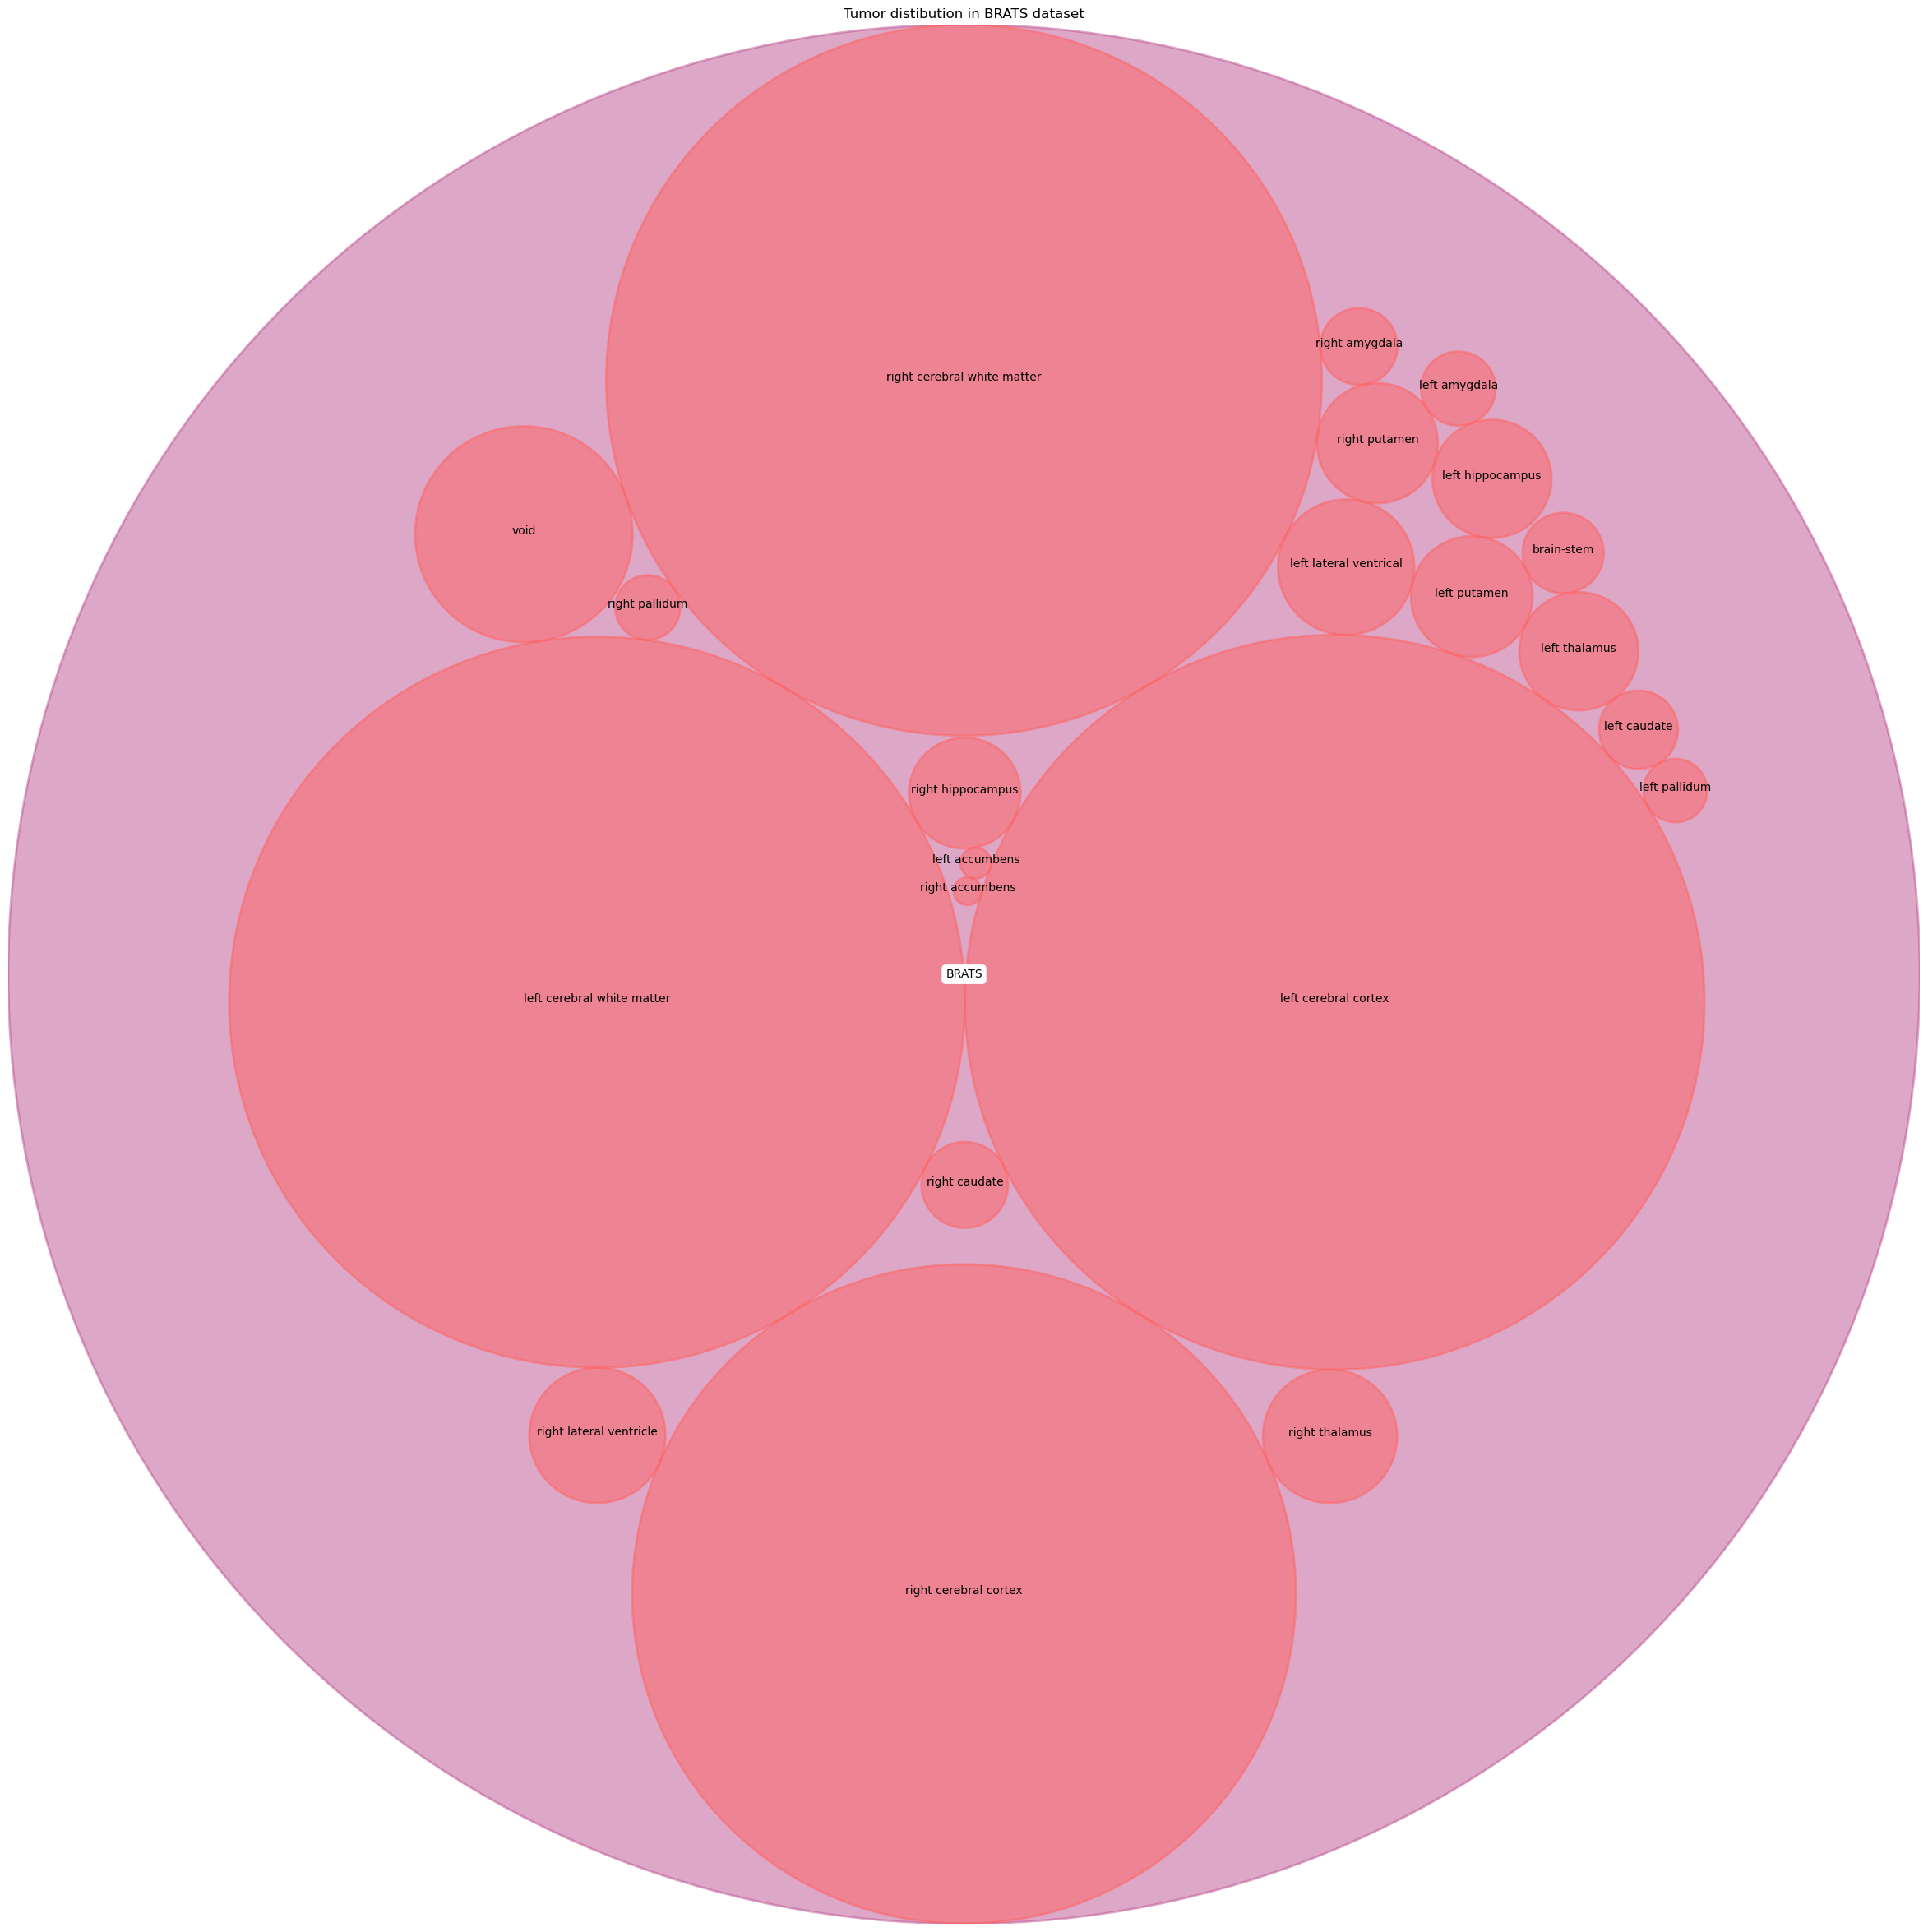

In [12]:

# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(30, 30))

# Title
ax.set_title('Tumor distibution in BRATS dataset')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level ==1:
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                     linewidth=2, color="#bc5090"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level == 2:
        x, y, r = circle
        label = circle.ex["id"]
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color="#ff6361"))
        plt.annotate(label, (x, y), ha='center', color="black")

# Print labels for the continents
for circle in circles:
    if circle.level == 1:
        x, y, r = circle
        label = circle.ex["id"]
        bbox_props = {'facecolor':'wheat', 'boxstyle': 'round', 'color': 'white'}
        plt.annotate(label, (x, y), va='center', ha='center', bbox=bbox_props)





## Lollipop plots

Text(0, 0.5, 'Locations affected by tumors in the BRATS dataset')

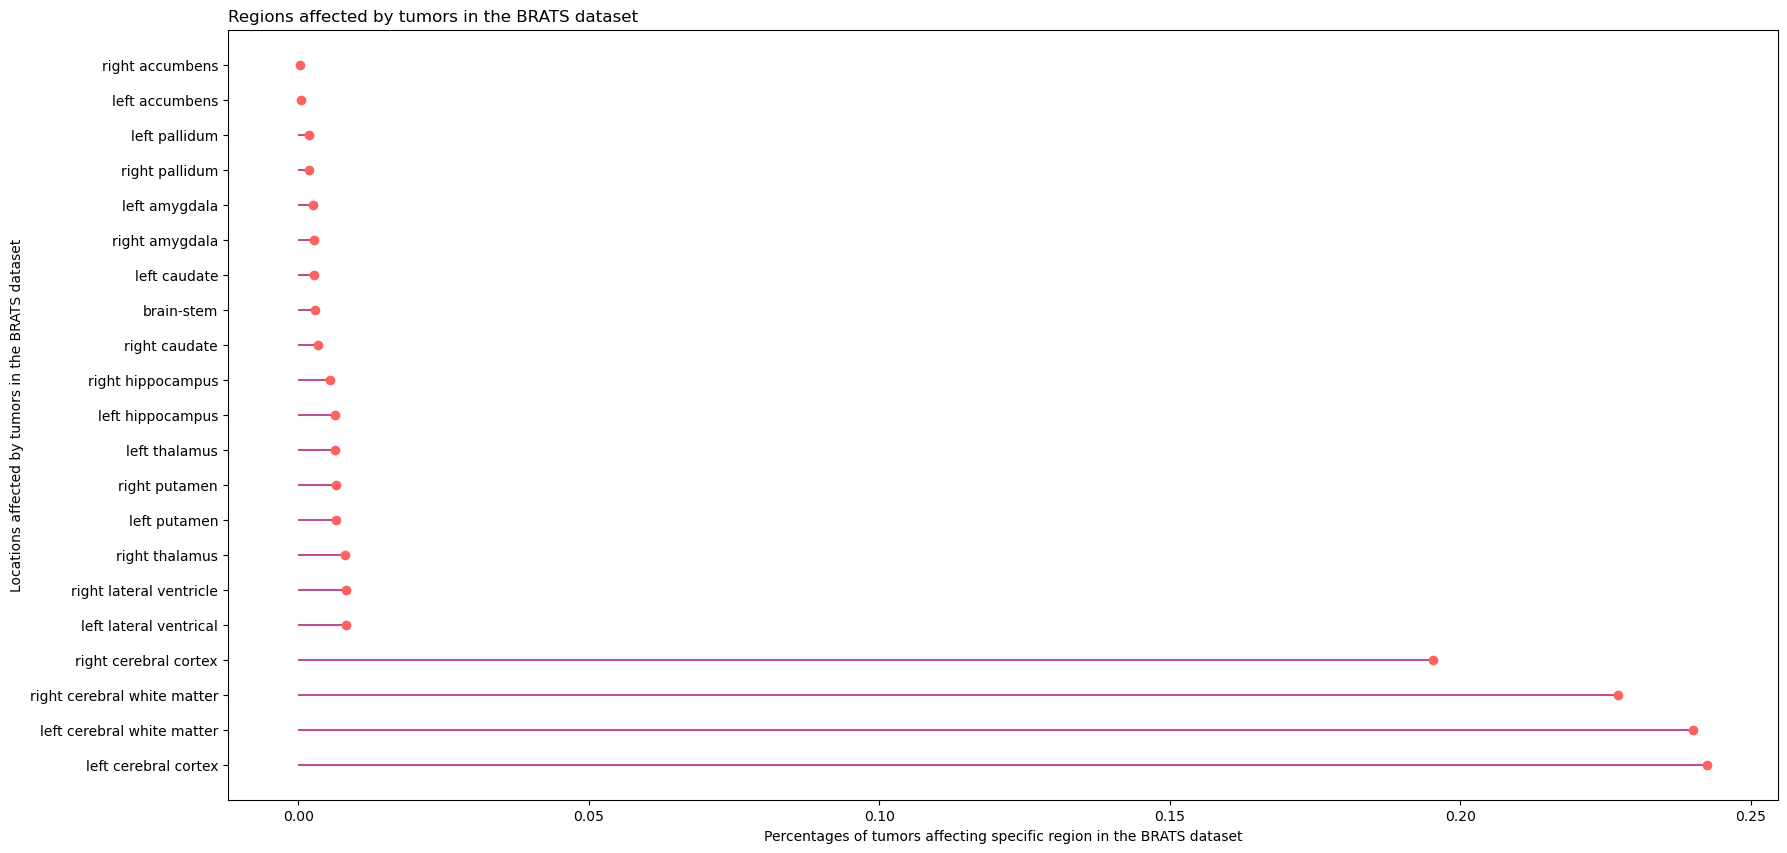

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('res/BRATS/per_dataset/subcortical_stats_for_BRATS.csv', index_col=0)
df = df.drop(index='void')
ordered_df = df.sort_values(by='Tumor in region', ascending=False)
x_range = range(0,len(df.index))
df.head(30)



# Make the plot
plt.figure(figsize=(20,10))
plt.hlines(y=x_range, xmin=0, xmax=ordered_df['Tumor in region'], color='#bc5090')
plt.plot(ordered_df['Tumor in region'], x_range, "o", c='#ff6361')

# Add titles and axis names
plt.yticks(x_range, ordered_df.index)
plt.title("Regions affected by tumors in the BRATS dataset", loc='left')
plt.xlabel('Percentages of tumors affecting specific region in the BRATS dataset')
plt.ylabel('Locations affected by tumors in the BRATS dataset')

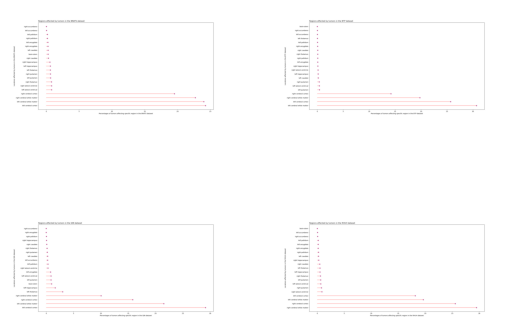

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filenames = ["test/lollipop_plot_for_BRATS.png", "test/lollipop_plot_for_BTP.png", "test/lollipop_plot_for_QIN.png", "test/lollipop_plot_for_RHUH.png"]

fig, axs = plt.subplots(2, 2)
for i, ax in enumerate(axs.flat):
    ax.set_axis_off()
    filename = filenames[i]
    ax.imshow(mpimg.imread(filename))
plt.show()